# Medical Dataset - Segmenting Patients

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df=pd.read_csv('patient_dataset.csv')
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


## Defining Problem Statement and perform Exploratory Data Analysis

### Observations on the data types of all the attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

###  Missing value check

In [5]:
print('Missing Values in the dataset ')
df.isna().sum()

Missing Values in the dataset 


age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [6]:
print("Total Missing Values ")
df.isna().sum().sum()


Total Missing Values 


2718

### Outlier detection

In [7]:
# Extracting Numerical data from the pool
numeric_data=df.select_dtypes('number')
numeric_data.head(5)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1


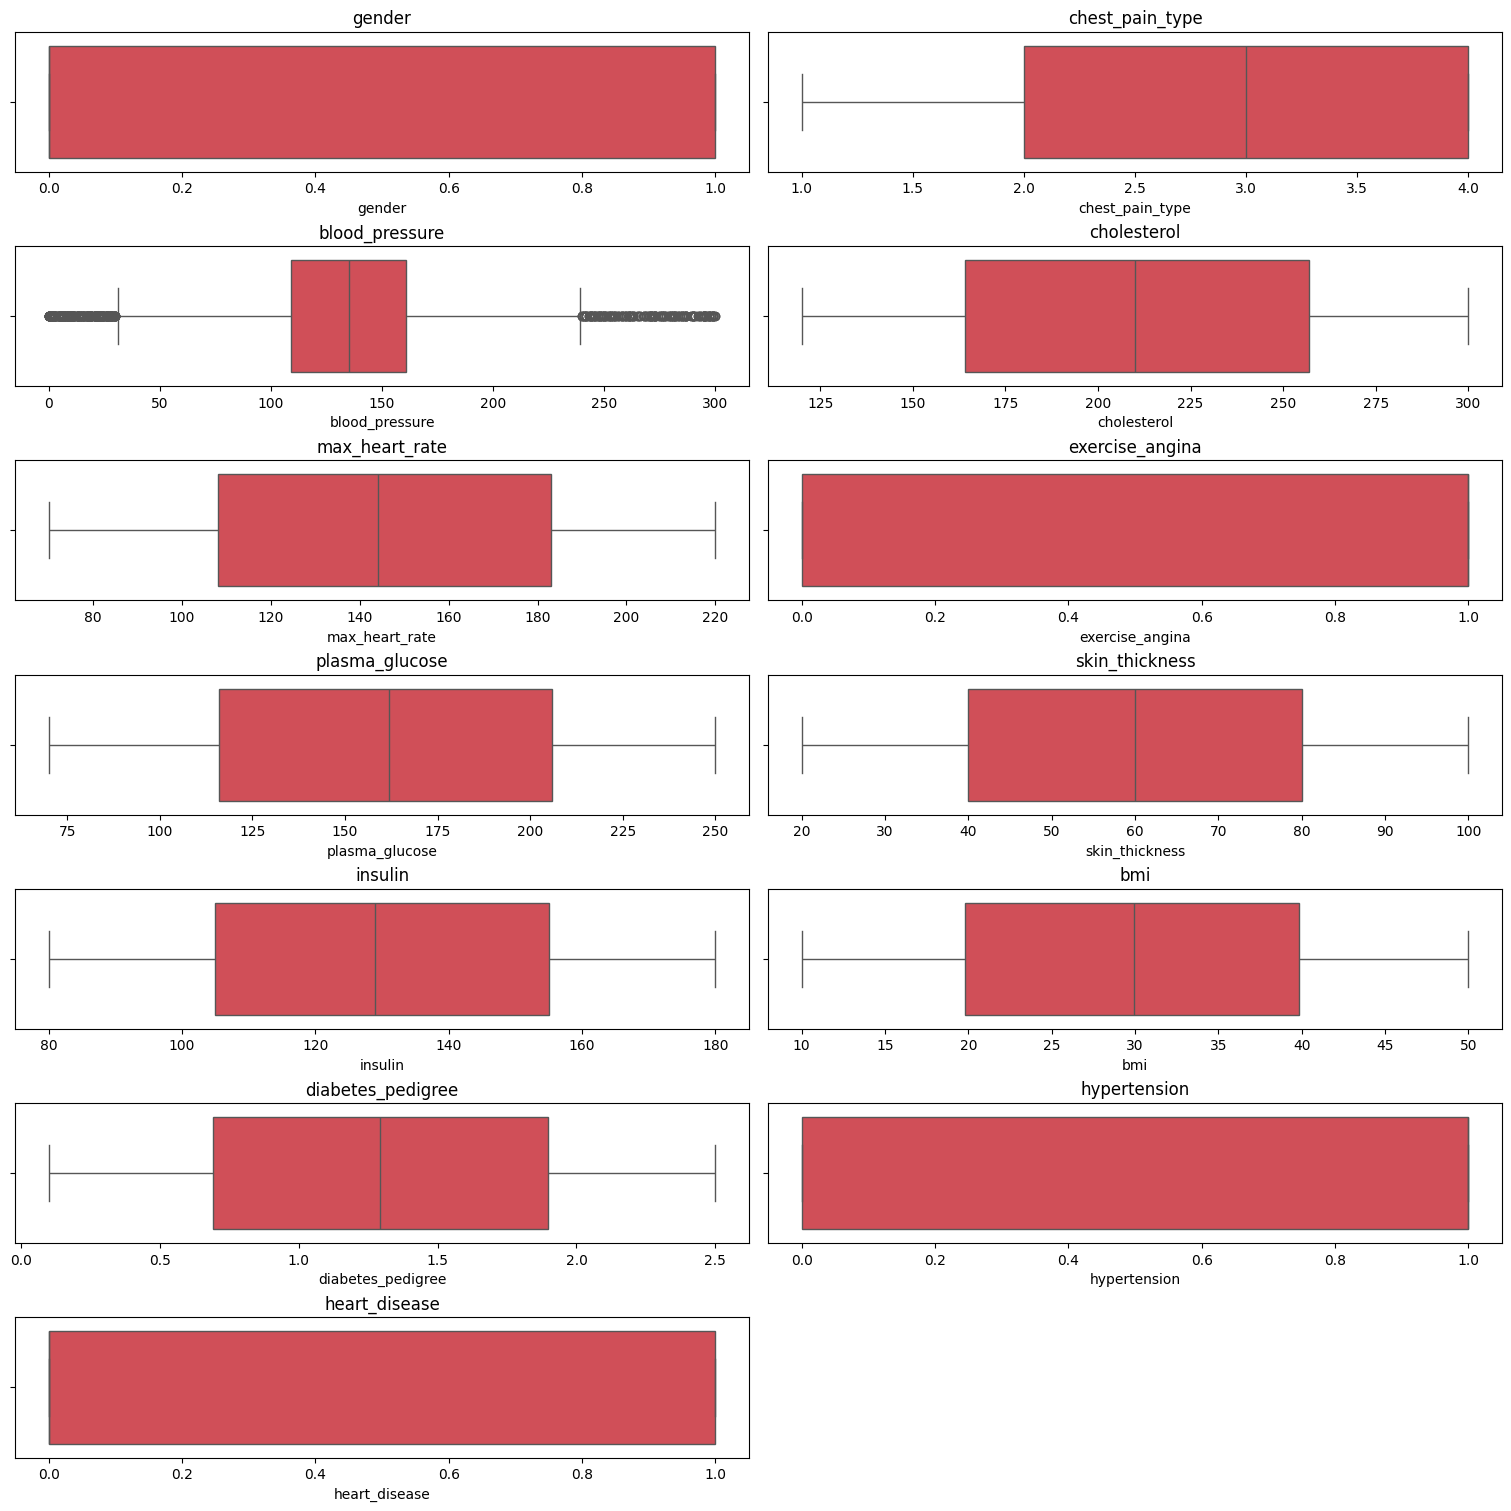

In [8]:
plt.figure(
    figsize=(15, 15),
    layout="constrained",
    frameon=True
)
i=1
for plot in range(0,numeric_data.shape[1]-1):
    plt.subplot(7,2,i)    
    sns.boxplot(x=numeric_data.columns[i], data=numeric_data, color="#e63946")
    plt.title(numeric_data.columns[i])
    i+=1
plt.show()

#### Only found outliers in blood_preassure

----------

##  Relationship between important variables

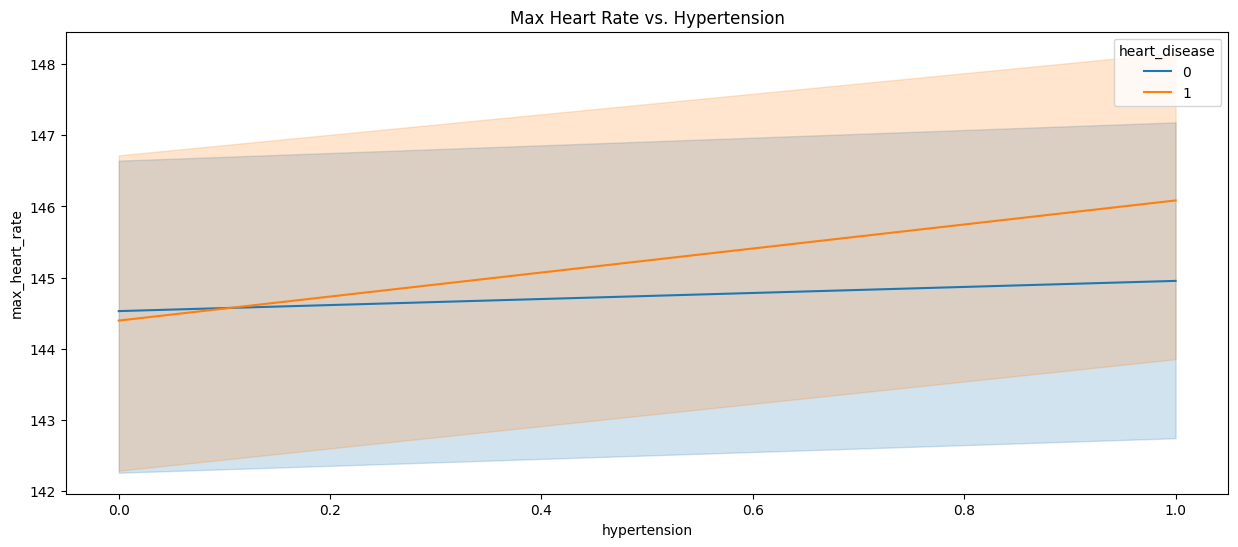

In [9]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=df["hypertension"], y=df["max_heart_rate"], hue=df["heart_disease"])
plt.title("Max Heart Rate vs. Hypertension")
plt.show()

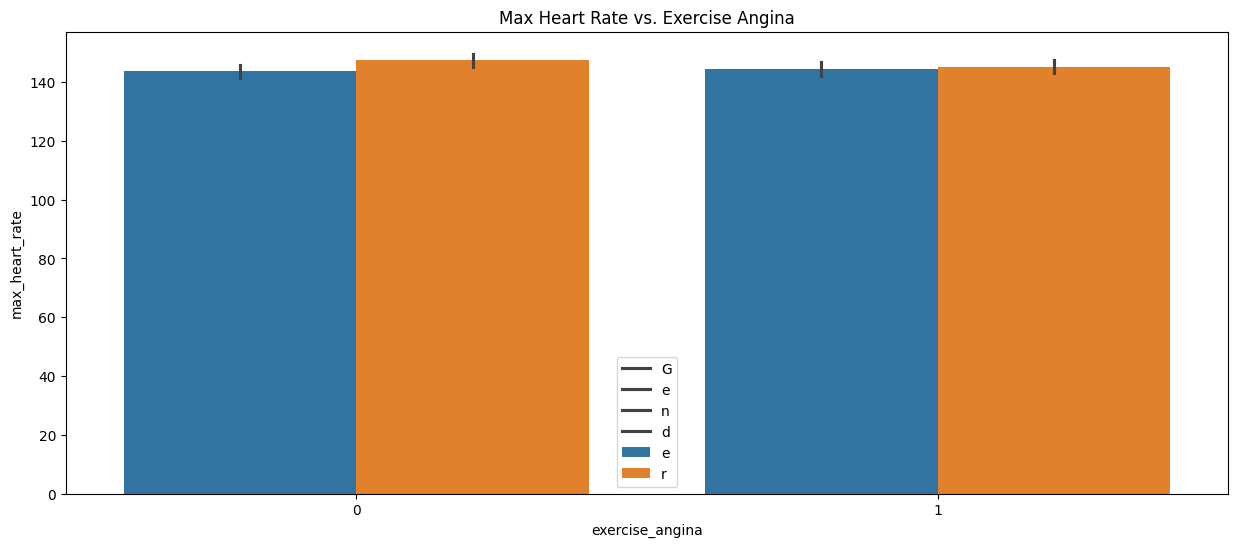

In [10]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["exercise_angina"], y=df["max_heart_rate"], hue=df["gender"])
plt.title("Max Heart Rate vs. Exercise Angina")
plt.legend('Gender')
plt.show()

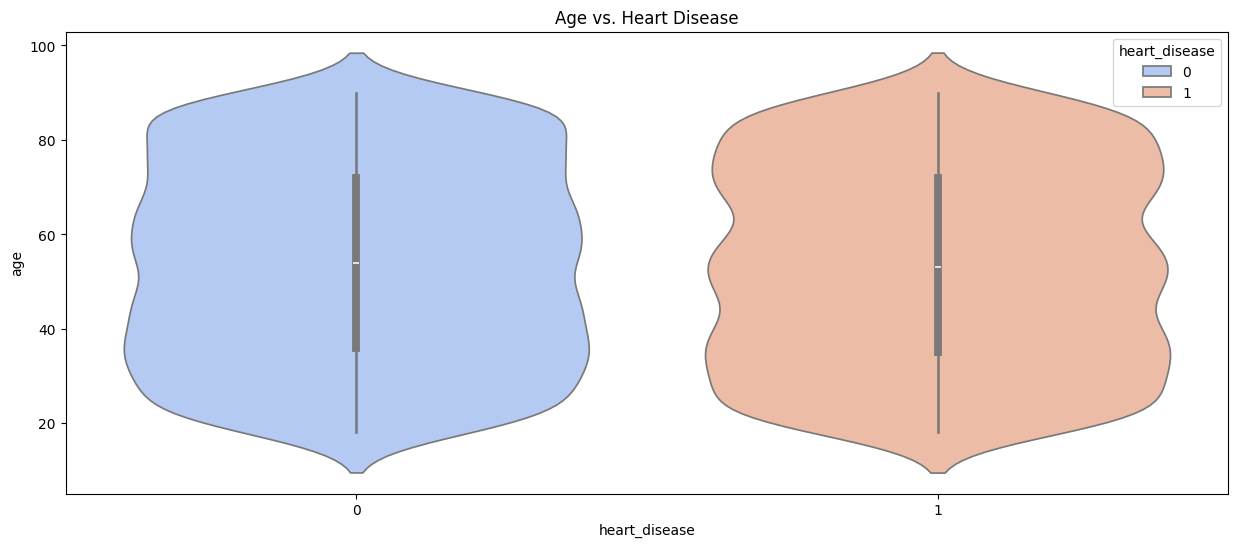

In [11]:
plt.figure(figsize=(15, 6))
sns.violinplot(
    x=df["heart_disease"], y=df["age"], palette="coolwarm", hue=df["heart_disease"]
)
plt.title("Age vs. Heart Disease")
plt.show()

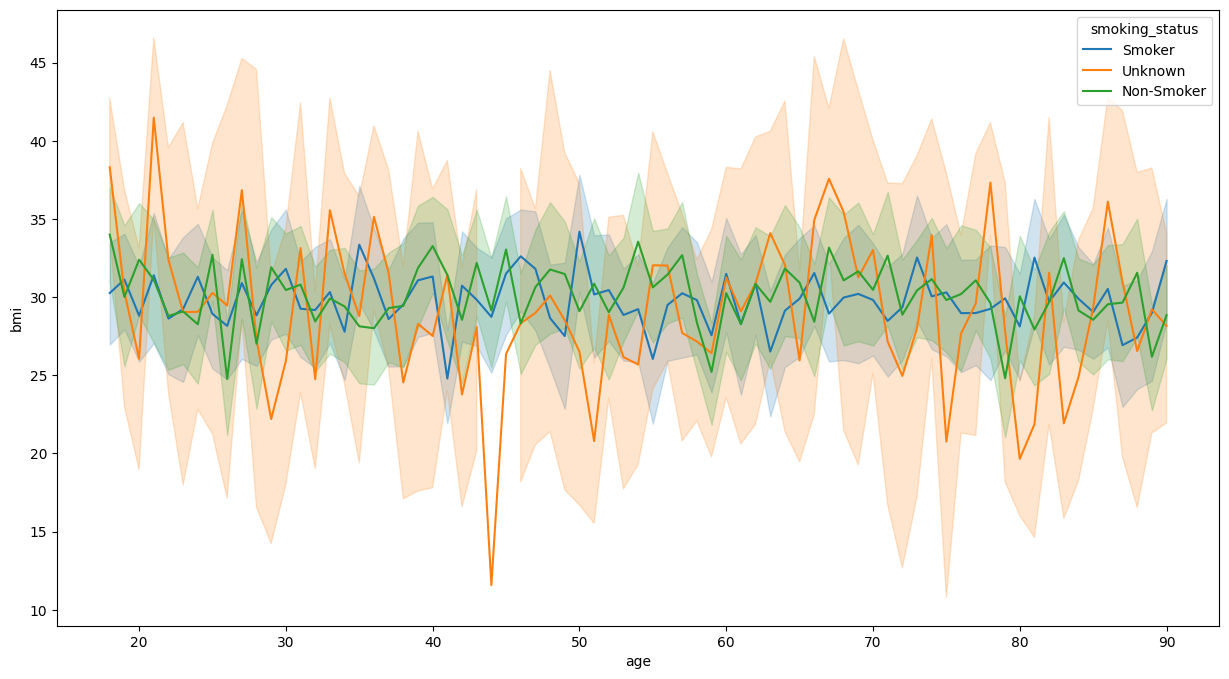

In [12]:
plt.figure(figsize=(15, 8))
sns.lineplot(y=df["bmi"], x=df["age"], hue=df["smoking_status"])
plt.show()

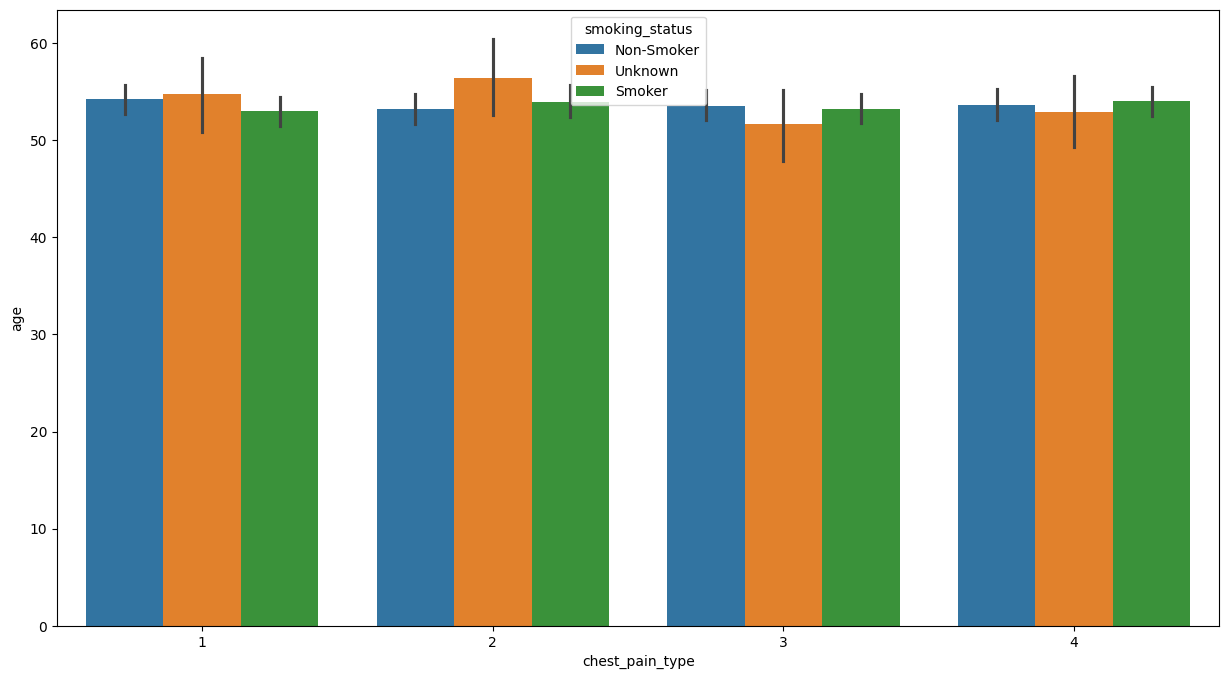

In [13]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df['chest_pain_type'], y=df['age'], hue=df['smoking_status'])
plt.show()

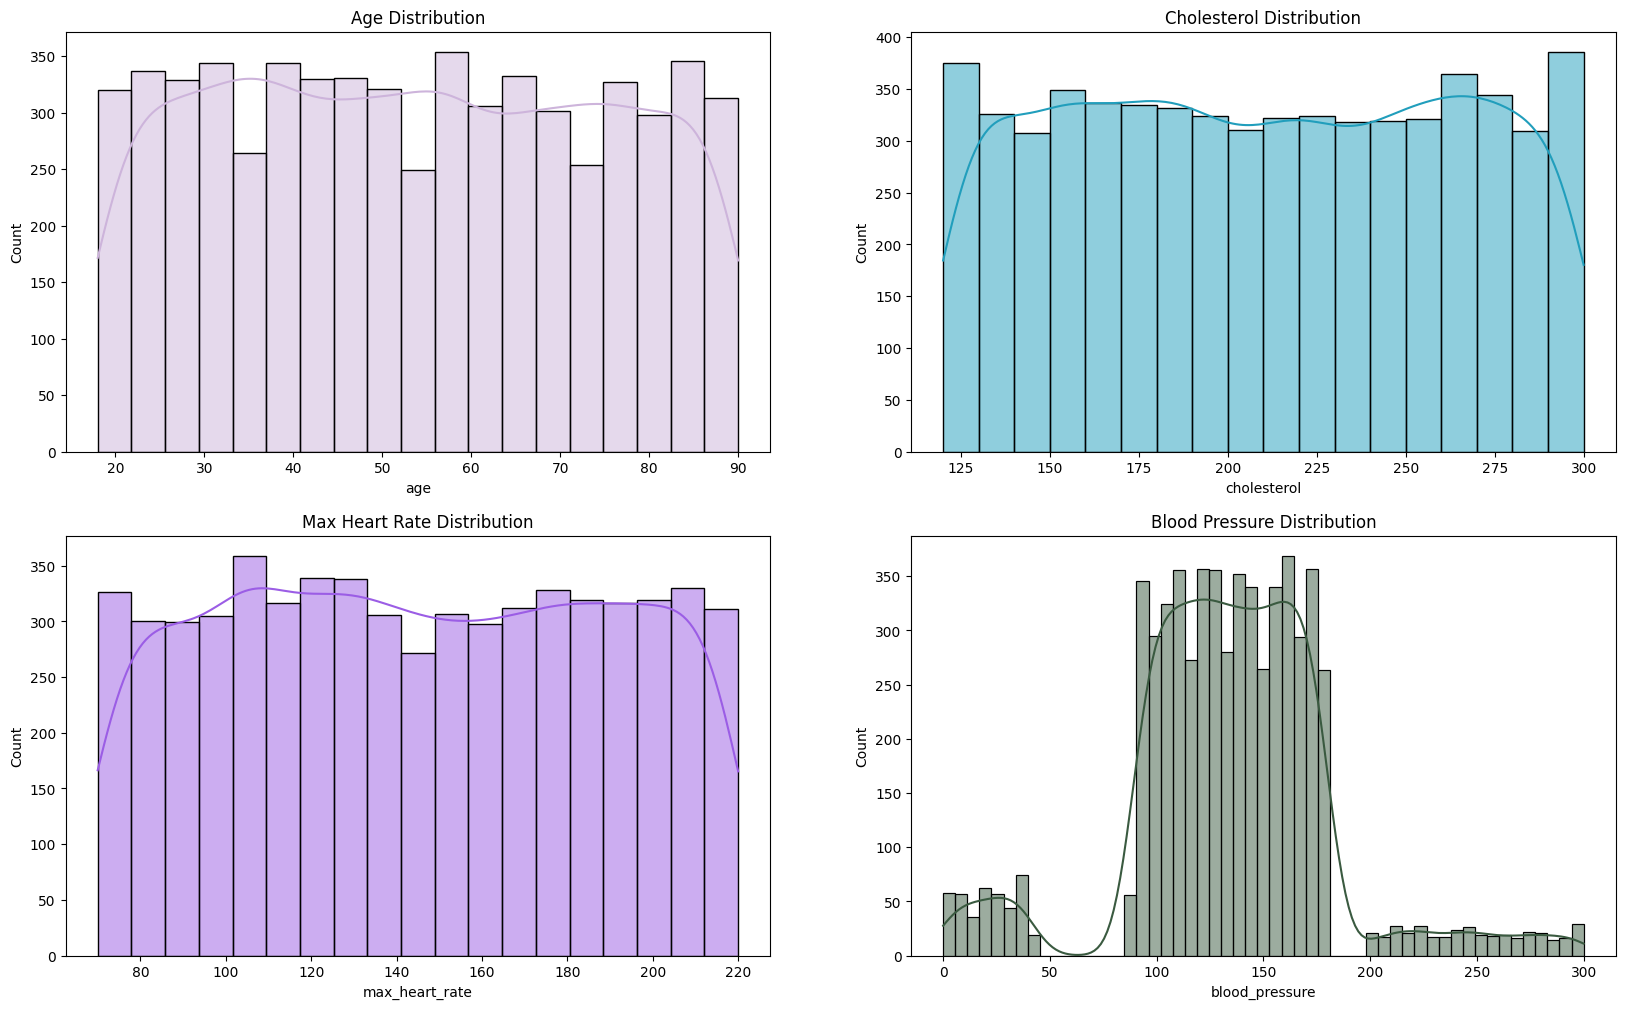

In [14]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.histplot(df["age"], kde=True, color="#cdb4db")
plt.title("Age Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df["cholesterol"], kde=True, color="#219ebc")
plt.title("Cholesterol Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df["max_heart_rate"], kde=True, color="#9b5de5")
plt.title("Max Heart Rate Distribution")


plt.subplot(2, 2, 4)
sns.histplot(df["blood_pressure"], kde=True, color="#3a5a40")
plt.title("Blood Pressure Distribution")

plt.show()


<Figure size 2000x2000 with 0 Axes>

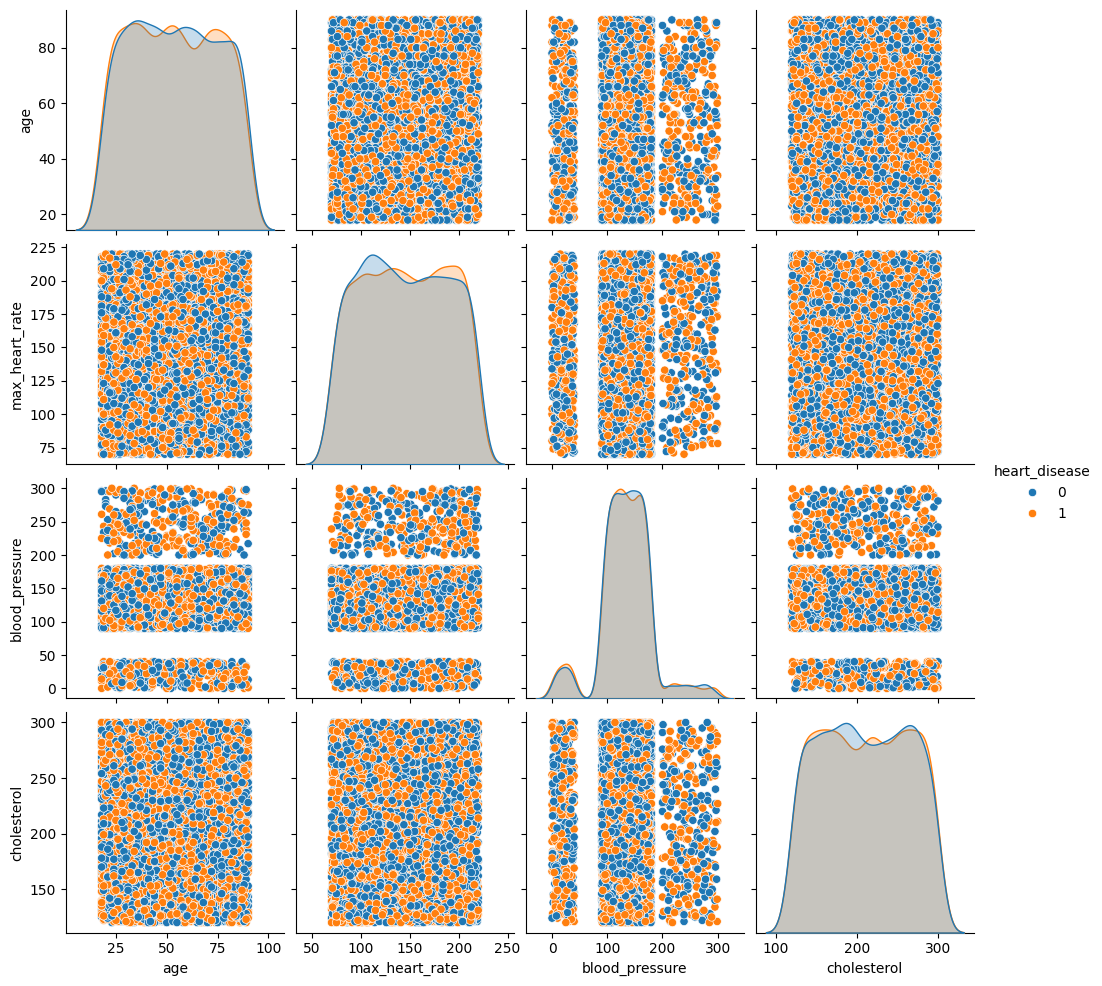

In [16]:
plt.figure(figsize=(20, 20))
sns.pairplot(
    df[["age", "max_heart_rate", "blood_pressure", "cholesterol", "heart_disease"]],
    hue="heart_disease",
)
plt.show()


### Illustrate the insights based on EDA

---------------
-----------------

---------------------

## Data Preprocessing

### Imputation

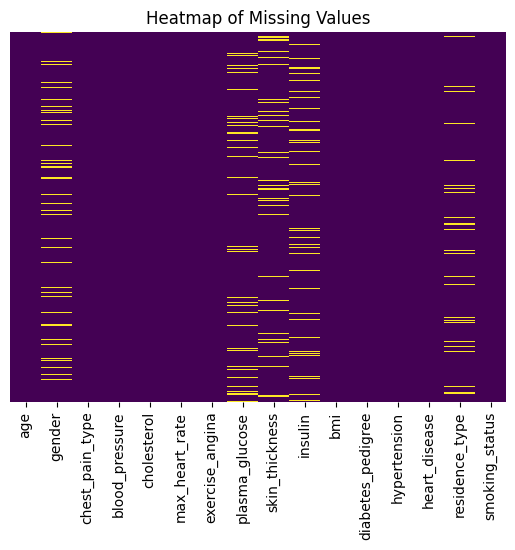

In [191]:
# Handling Missing values 
missing_values_data=df.isna().sum()[df.isna().sum()>0]

sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [192]:
#Calculating the percentage of missing values
missing_percentage = round((missing_values_data / len(df)) * 100, 2)

missing_data_summary = pd.DataFrame(
    {
        "Missing Values": missing_values_data[missing_values_data > 0],
        "Percentage (%)": missing_percentage[missing_values_data > 0],
    }
).sort_values(by="Percentage (%)", ascending=False)

print(missing_data_summary)


                Missing Values  Percentage (%)
skin_thickness             614           10.23
plasma_glucose             609           10.15
insulin                    568            9.47
gender                     472            7.87
residence_type             455            7.58


---------

In [193]:
# Handeling skin_thikness

# Filled with average value of the column
df['skin_thickness']=df['skin_thickness'].fillna(df['skin_thickness'].mean())

--------------

In [194]:
# Handling plasma_glucose
# Filled with average value of the column
df["plasma_glucose"] = df["plasma_glucose"].fillna(df["plasma_glucose"].mean())

--------------

In [195]:
# Handling insulin
# Filled with average value of the column
df["insulin"] = df["insulin"].fillna(df["insulin"].mean())

-----------------

In [196]:
# Handling 'Gender' 
df['gender'].nunique()

2

In [197]:
# since their are only 2 types of gender present in the dataset 
# the null values can be filled with the mode
df['gender']=df['gender'].fillna('unknown')

-------------

In [198]:
# Handling residence_type
df['residence_type'].nunique()

2

In [199]:
# Null values filled with mode
# since their are only 2 types of gender present in the dataset
df["residence_type"] = df["residence_type"].fillna("unknown")

In [200]:
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

----------------------

-------------------------

### Outlier Treatment

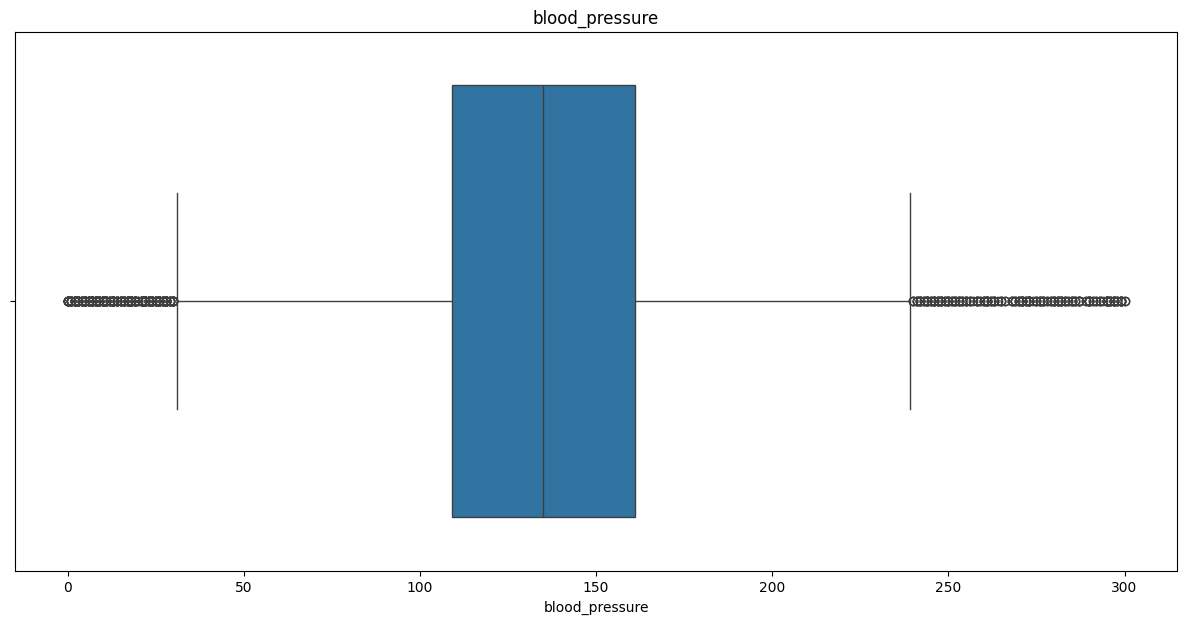

In [159]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df['blood_pressure'], data=df)
plt.title("blood_pressure")
plt.show()

In [160]:
# funcion to calculate lower bound & upper bound of a feature
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound,upper_bound

In [161]:
outliers, lower, upper = detect_outliers_iqr('blood_pressure')
len(outliers), lower, upper

(498, 31.0, 239.0)

In [162]:
# Cap the outliers
df["blood_pressure"] = np.where(
    df["blood_pressure"] < lower, lower, df["blood_pressure"]
)
df["blood_pressure"] = np.where(
    df["blood_pressure"] > upper, upper, df["blood_pressure"]
)

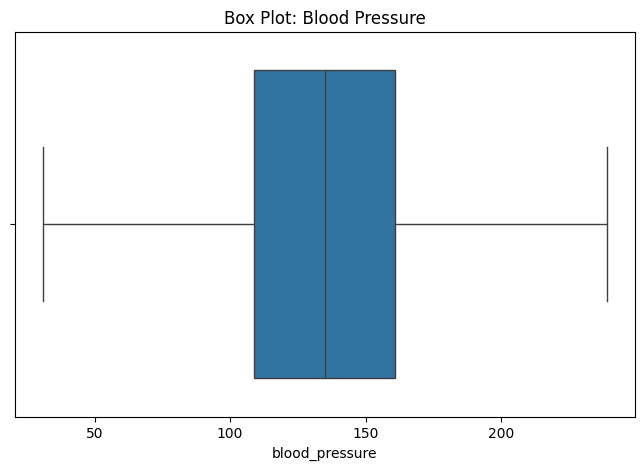

In [163]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["blood_pressure"])
plt.title("Box Plot: Blood Pressure")
plt.show()


--------------
-----------------

### Encoding all the categorical attributes

In [201]:
categorical_data=df.select_dtypes("object")
categorical_data.head(5)

,gender,residence_type,smoking_status
0,1.0,Urban,Smoker
1,0.0,Urban,Unknown
2,0.0,Rural,Non-Smoker
3,unknown,Rural,Smoker
4,1.0,Rural,Smoker


In [202]:
# Encoding gender
df["gender"].value_counts().index

Index([0.0, 1.0, 'unknown'], dtype='object', name='gender')

In [203]:
gender_map = {0.0:0.0, 1.0:1.0,"unknown": .5}

df["gender"] = df["gender"].map(gender_map)

df["gender"]


0       1.0
1       0.0
2       0.0
3       0.5
4       1.0
       ... 
5995    1.0
5996    1.0
5997    0.0
5998    0.0
5999    1.0
Name: gender, Length: 6000, dtype: float64

In [204]:
# Encoding residence_type

df['residence_type'].value_counts().index

Index(['Urban', 'Rural', 'unknown'], dtype='object', name='residence_type')

In [205]:
residence_type_map = {"Urban": 0, "Rural": 1, "unknown": 2}

df['residence_type']=df['residence_type'].map(residence_type_map)

df['residence_type']

0       0
1       0
2       1
3       1
4       1
       ..
5995    1
5996    0
5997    0
5998    0
5999    2
Name: residence_type, Length: 6000, dtype: int64

In [206]:
# Encoding smoking_status

df["smoking_status"].value_counts().index

Index(['Smoker', 'Non-Smoker', 'Unknown'], dtype='object', name='smoking_status')

In [207]:
smoking_status = {'Smoker':1, 'Non-Smoker':2, 'Unknown':3}

df["smoking_status"] = df["smoking_status"].map(smoking_status)

df["smoking_status"]

0       1
1       3
2       2
3       1
4       1
       ..
5995    2
5996    2
5997    2
5998    2
5999    2
Name: smoking_status, Length: 6000, dtype: int64

### Standardization

In [208]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df[df.columns] = scaler.fit_transform(df)
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,-1.411160,1.046343,1.318087,2.395969,-1.340840,1.537505,-1.006354,-1.068852,-1.223471,-0.741370,0.693118,-1.180427,0.997337,1.003673,-0.982661,-0.977989
1,-1.173253,-1.037313,1.318087,-0.047147,-0.432369,0.045985,-1.006354,0.822578,-0.815114,0.000000,-0.374450,-1.464958,0.997337,1.003673,-0.982661,2.202463
2,-0.364370,-1.037313,0.428390,2.830761,-0.470222,1.101522,-1.006354,-0.243867,-0.769741,-0.993277,0.683890,1.707102,0.997337,-0.996340,0.620811,0.612237
3,0.920327,0.004515,-0.461308,-0.668278,-0.186325,-0.458838,-1.006354,-1.129217,0.772942,1.273883,-0.970392,0.257191,-1.002670,1.003673,0.620811,-0.977989
4,-0.221626,1.046343,0.428390,-0.896027,-0.886605,1.078576,-1.006354,0.017714,-1.314217,1.453816,-1.477234,-1.097297,0.997337,1.003673,0.620811,-0.977989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.063071,1.046343,-1.351006,-0.357713,0.703220,-1.307857,0.993687,-1.149339,-1.722575,1.777696,1.074011,1.047984,0.997337,-0.996340,0.620811,0.612237
5996,-0.126463,1.046343,-0.461308,0.801732,1.649544,-1.468482,-1.006354,0.943308,0.636823,-1.713010,-0.503029,-0.025956,-1.002670,1.003673,-0.982661,0.612237
5997,0.777583,-1.037313,-0.461308,-0.295600,0.457175,-0.780088,-1.006354,-0.445083,-0.678995,-1.569064,0.906843,-0.940173,-1.002670,1.003673,-0.982661,0.612237
5998,1.158234,-1.037313,-0.461308,-0.067852,-0.394516,-0.275266,0.993687,0.701849,1.045180,0.734083,-0.426170,-0.834250,0.997337,-0.996340,-0.982661,0.612237


In [209]:
df.to_csv('cleaned_patient_dataset.csv', index=False)

###  Correlation between all the attributes

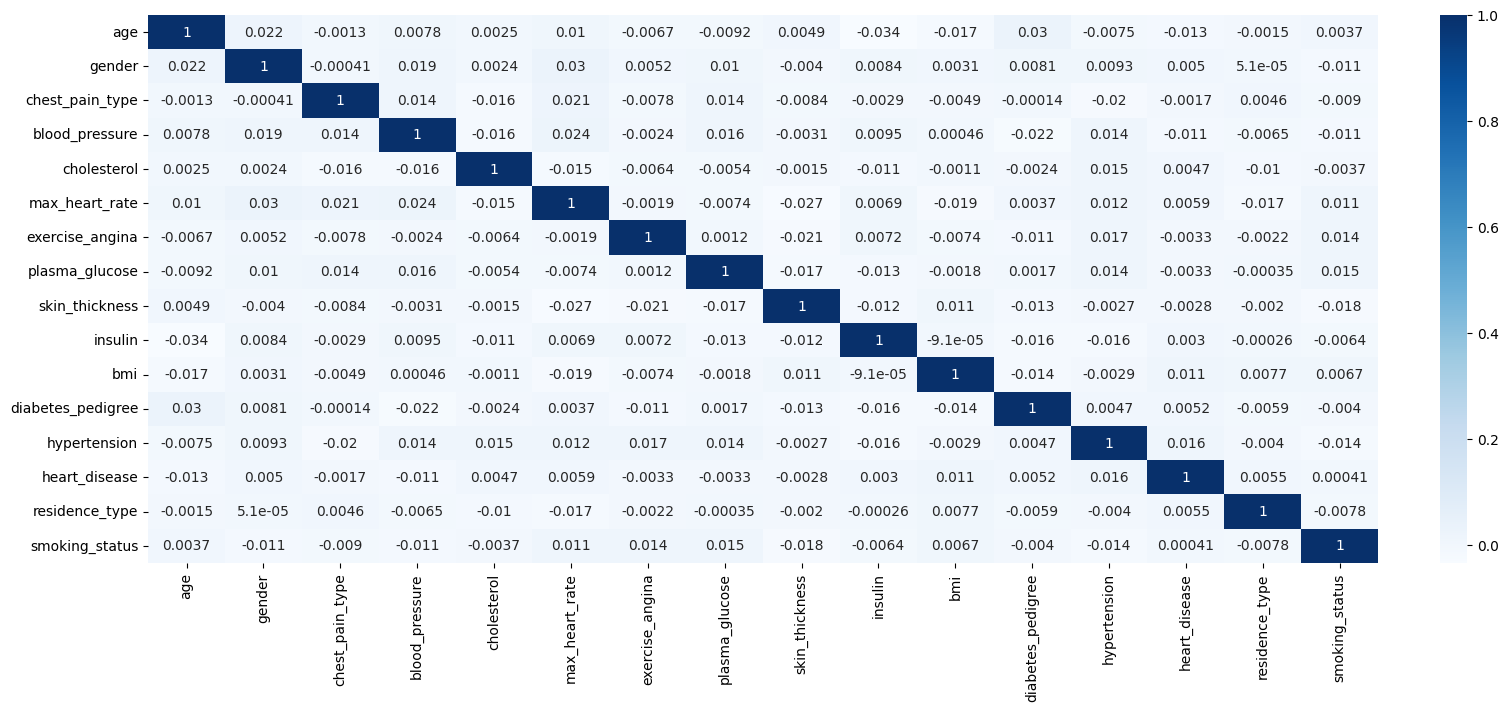

In [170]:
plt.figure(figsize=(15, 7), layout="constrained")
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')
plt.show()

----------------
--------------------
----------------

## Model Training

### K-Means Clustering

In [210]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias =[]
sillhoetteScore = []

for k in range(2,30):
    Kmeans = KMeans(
            n_clusters=k,
            init='k-means++',
    )
    result=Kmeans.fit(df)
    inertias.append(result.inertia_)
    score = silhouette_score(df, result.labels_)
    sillhoetteScore.append(score)

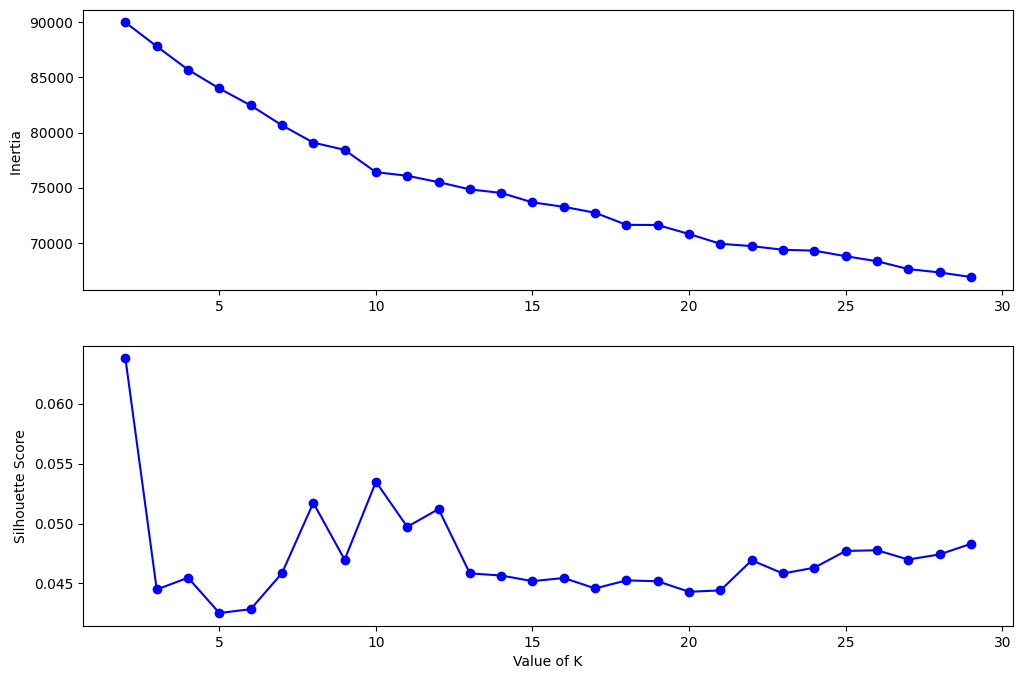

In [211]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(range(2, 30), inertias, "bo-")

plt.ylabel("Inertia ")

plt.subplot(2, 1, 2)
plt.plot(range(2, 30), sillhoetteScore, "bo-")
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()

In [213]:
optimal_k=13

In [214]:
kmeans = KMeans(n_clusters=optimal_k, init="k-means++")
kmeans.fit(df)

KMeans(n_clusters=13)

#### 2D Visualization using TSNE

In [215]:
from sklearn.manifold import TSNE

tsne = TSNE(2 , perplexity=200, n_iter=300)
components_tsne = tsne.fit_transform(df)


In [216]:
clusters_tsne = pd.DataFrame(components_tsne, columns=["X1", "X2"])
clusters_tsne["label"] = kmeans.labels_
clusters_tsne.head()

,X1,X2,label
0,-8.322012,7.366730,3
1,0.728626,-11.062153,2
2,5.965767,9.094355,6
3,1.325563,-5.026029,7
4,-8.456846,0.235248,7


<Figure size 640x480 with 0 Axes>

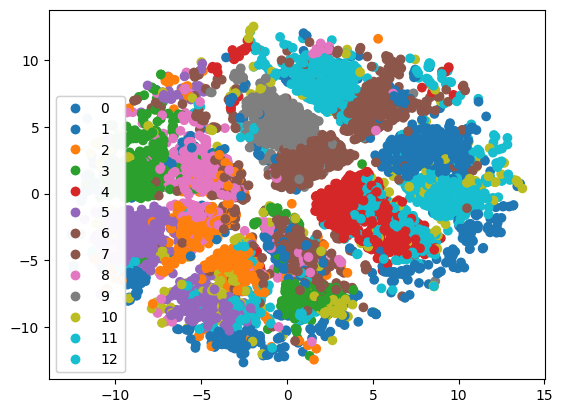

In [217]:
plt.set_cmap("tab10")

fig, ax = plt.subplots()
scatter = ax.scatter(clusters_tsne["X1"], clusters_tsne["X2"], c=clusters_tsne["label"])

legend = ax.legend(*scatter.legend_elements(), loc="lower left")
ax.add_artist(legend)

plt.show()
plt.close()

### UMAP

In [251]:
import umap

In [252]:
dir(umap)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [253]:
umap.UMAP()

AttributeError: module 'umap' has no attribute 'UMAP'

###  Gaussian Mixture Model

In [218]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=optimal_k, covariance_type="full")
gmm_model=gmm.fit(df)

In [219]:
labels = gmm_model.predict(df)
labels

array([ 0,  9,  9, ...,  8, 12,  1], dtype=int64)

In [84]:
from sklearn.manifold import TSNE

tsne = TSNE(2)
components_tsne = tsne.fit_transform(df)


In [220]:
GMM_tsne = pd.DataFrame(components_tsne, columns=["X1", "X2"])
GMM_tsne["label"] = labels
GMM_tsne.head()

,X1,X2,label
0,-8.322012,7.366730,0
1,0.728626,-11.062153,9
2,5.965767,9.094355,9
3,1.325563,-5.026029,8
4,-8.456846,0.235248,0


<Figure size 640x480 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

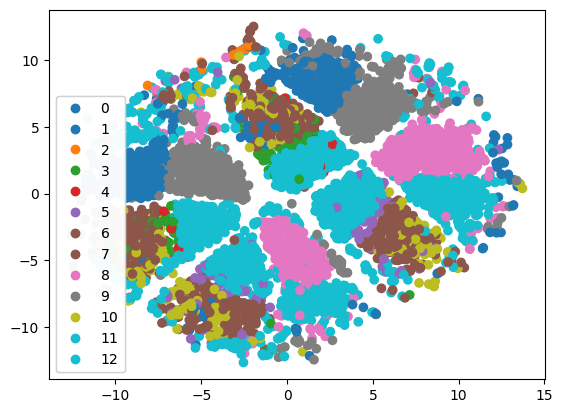

In [ ]:
plt.set_cmap("tab10")
fig, ax = plt.subplots()
scatter = ax.scatter(GMM_tsne["X1"], GMM_tsne["X2"], c=GMM_tsne["label"])

legend = ax.legend(*scatter.legend_elements(), loc="lower left")
ax.add_artist(legend)

plt.show()
plt.close()


### Hierarchical Clustering

In [87]:
from scipy.cluster import hierarchy

Z=hierarchy.linkage(df, method='ward')

In [88]:
Z.shape, Z

((5999, 4),
 array([[2.93300000e+03, 5.26500000e+03, 7.19210799e-01, 2.00000000e+00],
        [2.05800000e+03, 5.98600000e+03, 7.60652006e-01, 2.00000000e+00],
        [7.55000000e+02, 4.65400000e+03, 1.01880249e+00, 2.00000000e+00],
        ...,
        [1.19800000e+04, 1.19890000e+04, 5.08765909e+01, 1.84200000e+03],
        [1.19930000e+04, 1.19960000e+04, 6.26361044e+01, 3.40500000e+03],
        [1.19950000e+04, 1.19970000e+04, 7.06840563e+01, 6.00000000e+03]]))

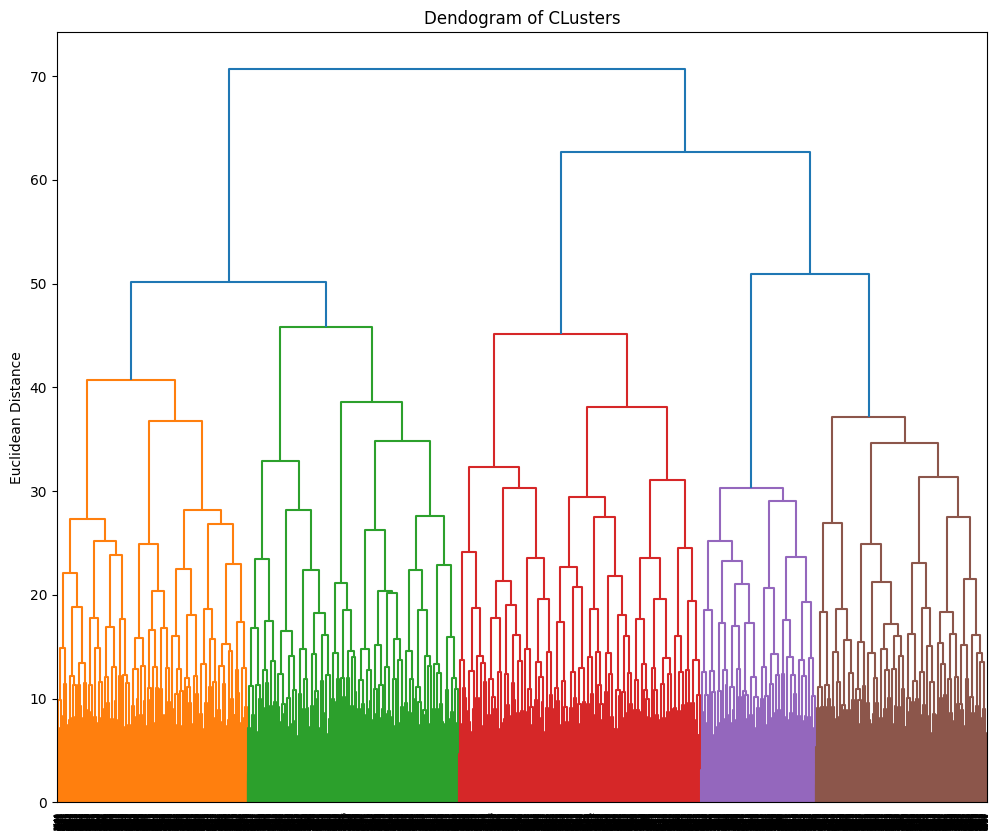

In [89]:
plt.figure(figsize=(12, 10))
hierarchy.dendrogram(Z)
plt.title('Dendogram of CLusters')
plt.ylabel('Euclidean Distance')
plt.show()

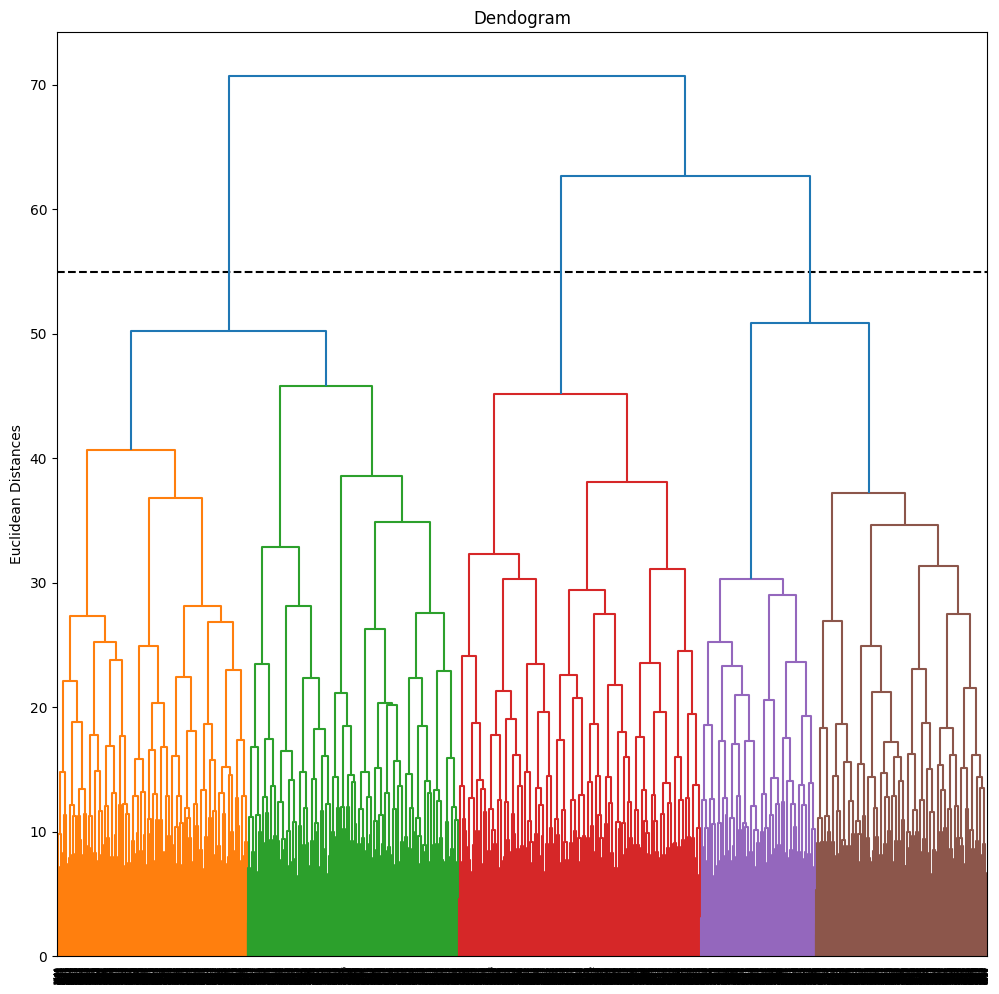

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.axhline(y=45, color="k", linestyle="--")
hierarchy.dendrogram(Z)
plt.title("Dendogram")
plt.ylabel("Euclidean Distances")
plt.show()


In [222]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(
    n_clusters=optimal_k, metric="euclidean", linkage="ward"
)
labels = agg_cluster.fit_predict(df)

In [115]:
print(f"Silhouette Score: {silhouette_score(df, labels)}")

Silhouette Score: 0.0025254475601273725


In [116]:
np.unique(labels), labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20], dtype=int64),
 array([ 4, 18,  4, ..., 18,  0,  4], dtype=int64))

In [119]:
sillhoetteScore_H = []

for c in range(2, 30):
    clustering = AgglomerativeClustering(
        n_clusters=c, metric="euclidean", linkage="ward"
    )
    prediction = clustering.fit_predict(df)
    score = silhouette_score(df, prediction)
    sillhoetteScore_H.append(score)


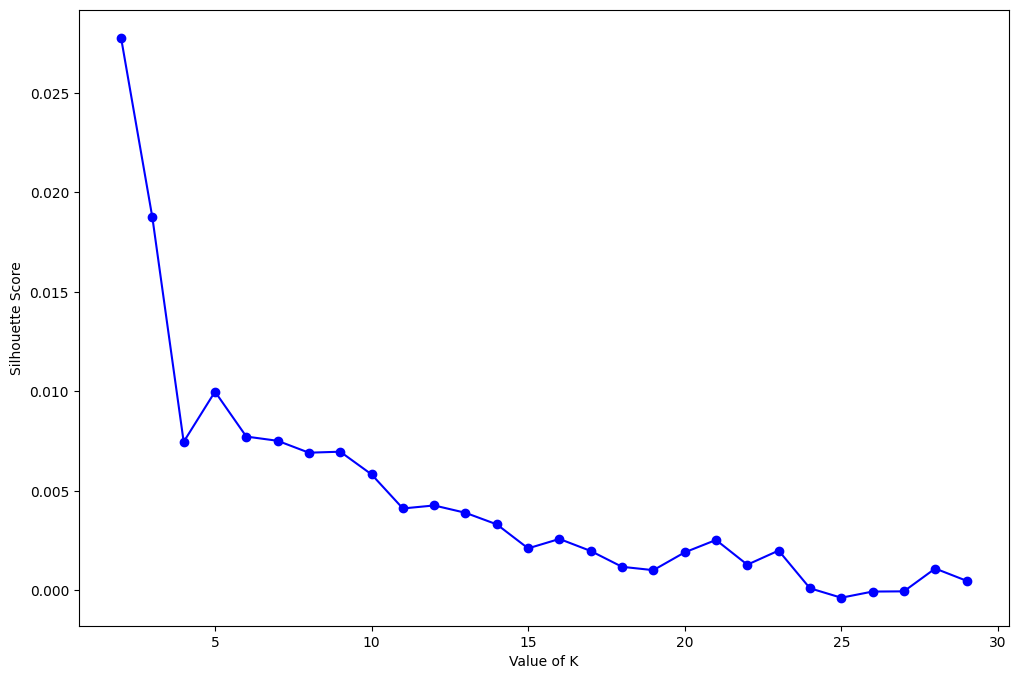

In [120]:
plt.figure(figsize=(12, 8))
plt.plot(range(2, 30), sillhoetteScore_H, "bo-")
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()


In [223]:
clustering = AgglomerativeClustering(
    n_clusters=optimal_k, metric="euclidean", linkage="ward"
)
labels=clustering.fit_predict(df)

In [132]:
model = TSNE(n_components=2, perplexity=250)
tsne_data = model.fit_transform(df)

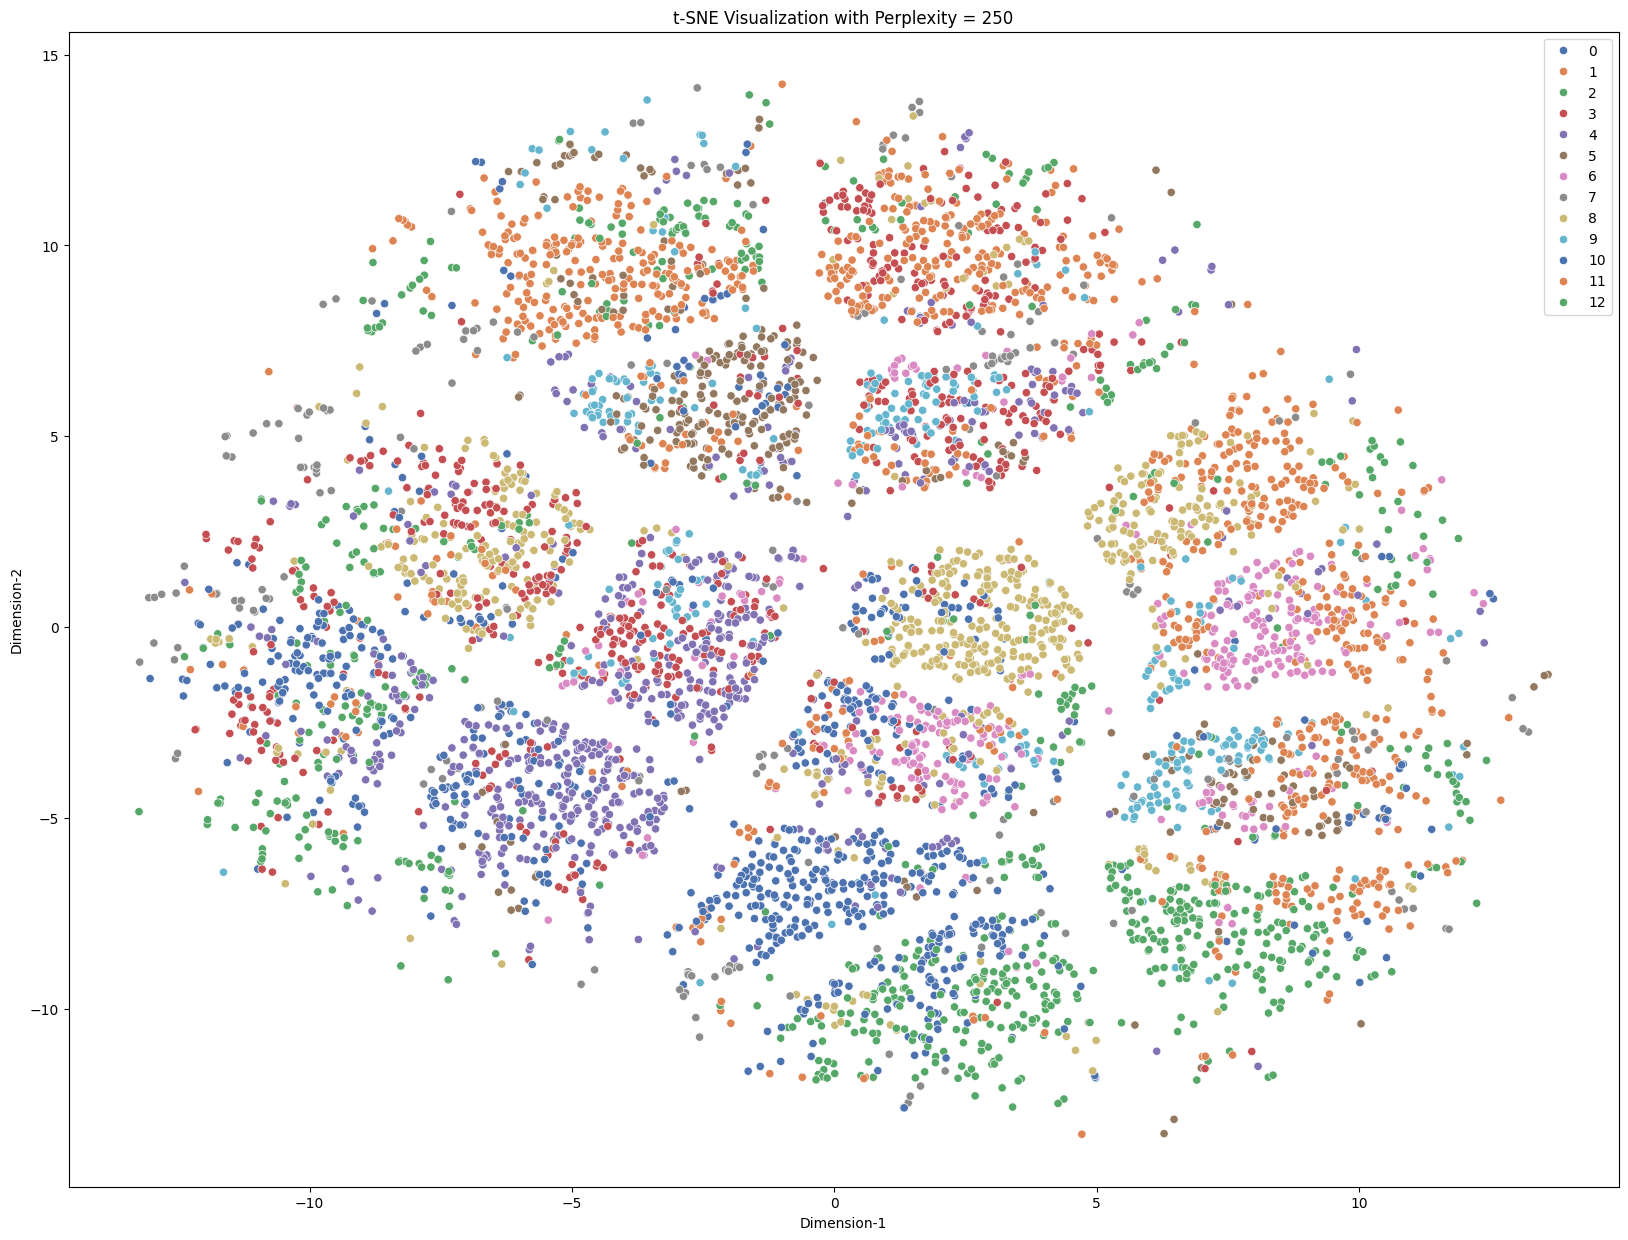

In [ ]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=labels, palette="deep")
plt.xlabel("Dimension-1")
plt.ylabel("Dimension-2")
plt.title("t-SNE Visualization with Perplexity = 200")
plt.show()

### How can hyperparameter tuning be performed to optimize the performance of clustering algorithms?

### Compare the clustering results of all the algorithms using Inertia and the Silhouette Score.


### Visualize the clusters formed using T-SNE for all the three algorithms.

## Expected Insights


### Identification of distinct patient groups based on health and lifestyle attributes.

### Understanding whether certain clusters correspond to high-risk vs. low-risk patients.

### Comparison of clustering algorithms to determine which provides the most meaningful segmentation.